##  This script is used to display the waveform generated by nEXO electronics simulation

### Read the root file generated by nexo-offline simulation

In [156]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

elecevents = uproot.open("./data/Baseline2019_bb0n_FullLXe_after_fixwf.root")["Event/Elec/ElecEvent/ElecEvent/fElecChannels"]
a=elecevents.arrays(["fElecChannels.fWFAmplitude","fElecChannels.fChannelCharge"],library="np",entry_start=7,entry_stop=8)
WFAmplitude=a["fElecChannels.fWFAmplitude"]
WFCharge=a["fElecChannels.fChannelCharge"]


### Take out the amplitude value of each channel and calculate the integral charge

In [119]:
channelnum=np.zeros(shape=(len(WFAmplitude[0]),len(WFAmplitude[0][0])+1))
for channel_num in np.arange((len(WFAmplitude[0]))):
    for num in np.arange((len(WFAmplitude[0][channel_num]))):
        channelnum[channel_num][num+1]=channelnum[channel_num][num]+WFAmplitude[0][channel_num][num]


### Integrated charge waveform

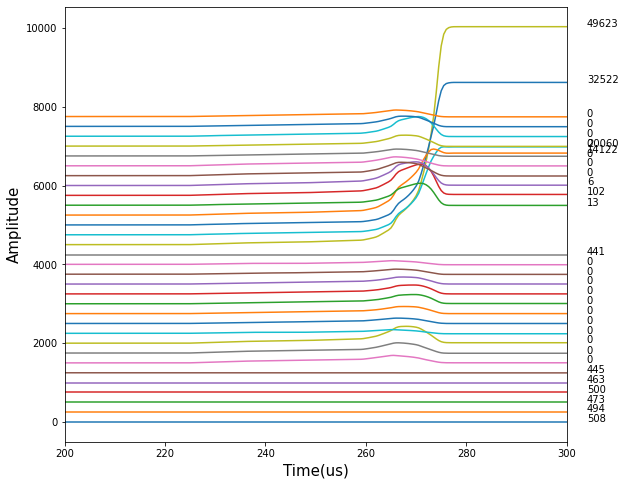

In [153]:
plt.figure(figsize=(9,8))
offset =250
for channel_num1 in np.arange((len(WFAmplitude[0]))):
    plt.plot(np.arange(0,len(channelnum[channel_num1])*0.5,0.5),channelnum[channel_num1]+channel_num1*offset,label='%i'%channel_num1)
    plt.xlabel('Time(us)',size=15)
    plt.text(len(WFAmplitude[0][channel_num1])*0.5+3,channelnum[channel_num1][len(WFAmplitude[0][channel_num])]+channel_num1*offset,'%.00f'%WFCharge[0][channel_num1])
    plt.xlim(200,300)
    plt.ylabel('Amplitude',size=15)
    #plt.legend(bbox_to_anchor=(1, 1))

### Amplitude waveform

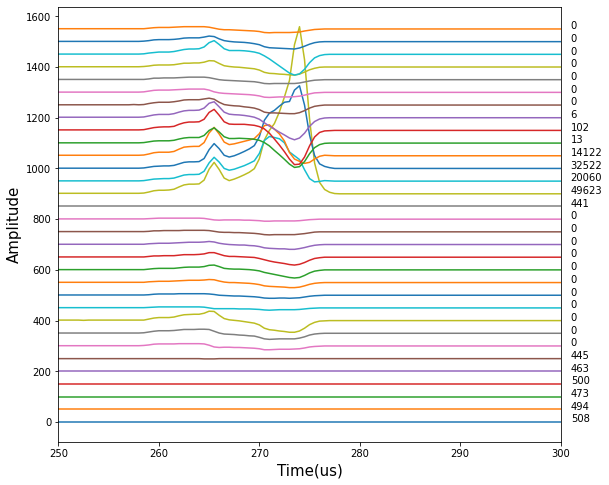

In [154]:
plt.figure(figsize=(9,8))
offset =50
for channel_num1 in np.arange((len(WFAmplitude[0]))):
    #plt.figure(channel_num1)
    plt.plot(np.arange(0,len(WFAmplitude[0][channel_num1])*0.5,0.5),WFAmplitude[0][channel_num1]+channel_num1*offset,label='%i'%channel_num1)
    plt.xlabel('Time(us)',size=15)
    plt.xlim(250,300)
    plt.text(len(WFAmplitude[0][channel_num1])*0.5,WFAmplitude[0][channel_num1][len(WFAmplitude[0][channel_num])-1]+channel_num1*offset,'%.00f'%WFCharge[0][channel_num1])
    plt.ylabel('Amplitude',size=15)
    #plt.savefig('./waveform{}.pdf'.format(channel_num1))
    #plt.legend(bbox_to_anchor=(1, 1))
    